# Global Energy Report
How much progress have we had towards creating more renewable energy to meet our constant demand for more electricity?

In [12]:
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Cleaning of Renewable Energy

              Year  Renewables (% equivalent primary energy)
count  5603.000000                               5603.000000
mean   1993.800821                                 10.735585
std      16.283556                                 12.923945
min    1965.000000                                  0.000000
25%    1980.000000                                  1.980135
50%    1994.000000                                  6.522184
75%    2008.000000                                 14.099622
max    2021.000000                                 86.874535
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5603 non-null   object 
 1   Code                                      4292 non-null   object 
 2   Year                                      5603 non-null 

<Axes: xlabel='Renewables (% equivalent primary energy)', ylabel='Count'>

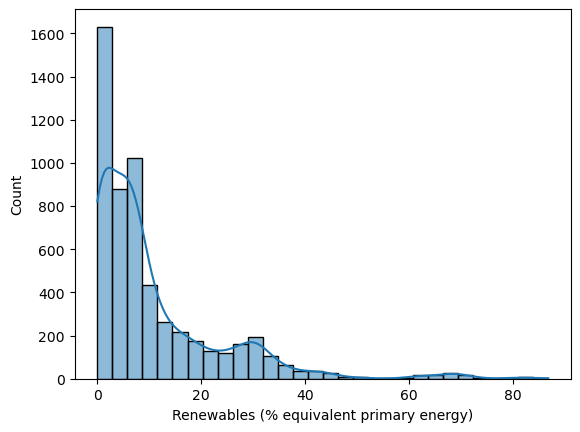

In [123]:
globalrenewable_energy = pd.read_csv("data/01 renewable-share-energy.csv")

print(globalrenewable_energy.describe())
print(globalrenewable_energy.info())

globalrenewable_energy.fillna(0, inplace=True)  # Fill NANs with 0 


sns.histplot(globalrenewable_energy["Renewables (% equivalent primary energy)"], bins=30, kde=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

/opt/anaconda3/envs/data_analysis_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


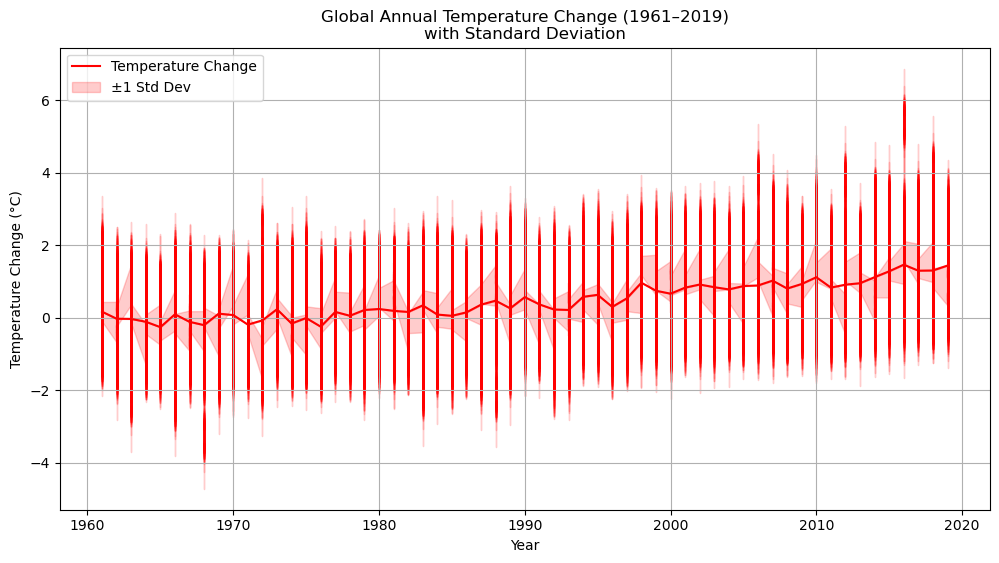

In [244]:

# Load data with correct encoding
file_path = "data/Environment_Temperature_change_E_All_Data_NOFLAG.csv"
df = pd.read_csv(file_path, encoding='latin-1')
print(df.info())

annual_temp = df[(df['Months'] == 'Meteorological year') & (df['Element'] == 'Temperature change')]
annual_std = df[(df['Months'] == 'Meteorological year') & (df['Element'] == 'Standard Deviation')]

# Define year columns dynamically (e.g., Y1961, Y1962, ..., Y2019)
year_cols = [col for col in df.columns if col.startswith('Y')]

# Melt ONLY year columns
melted_temp = annual_temp.melt(
    id_vars=['Months', 'Element'], 
    value_vars=year_cols,  # Explicitly specify year columns
    var_name='Year', 
    value_name='Temperature Change'
)
melted_std = annual_std.melt(
    id_vars=['Months', 'Element'], 
    value_vars=year_cols,  # Explicitly specify year columns
    var_name='Year', 
    value_name='Std Dev'
)

# Clean year values and merge
melted_temp['Year'] = melted_temp['Year'].str[1:].astype(int)
melted_std['Year'] = melted_std['Year'].str[1:].astype(int)
annual_df = pd.merge(melted_temp, melted_std, on='Year')

# Plot (same as before)
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_df, x='Year', y='Temperature Change', color='red', label='Temperature Change')
plt.fill_between(
    annual_df['Year'],
    annual_df['Temperature Change'] - annual_df['Std Dev'],
    annual_df['Temperature Change'] + annual_df['Std Dev'],
    color='red', alpha=0.2, label='±1 Std Dev'
)
plt.title('Global Annual Temperature Change (1961–2019)\nwith Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 22 to 22011
Columns: 130 entries, country to renewable_energy_pct
dtypes: float64(127), int64(1), object(2)
memory usage: 149.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 710 to 22011
Columns: 130 entries, country to renewable_energy_pct
dtypes: float64(127), int64(1), object(2)
memory usage: 105.4+ KB
None


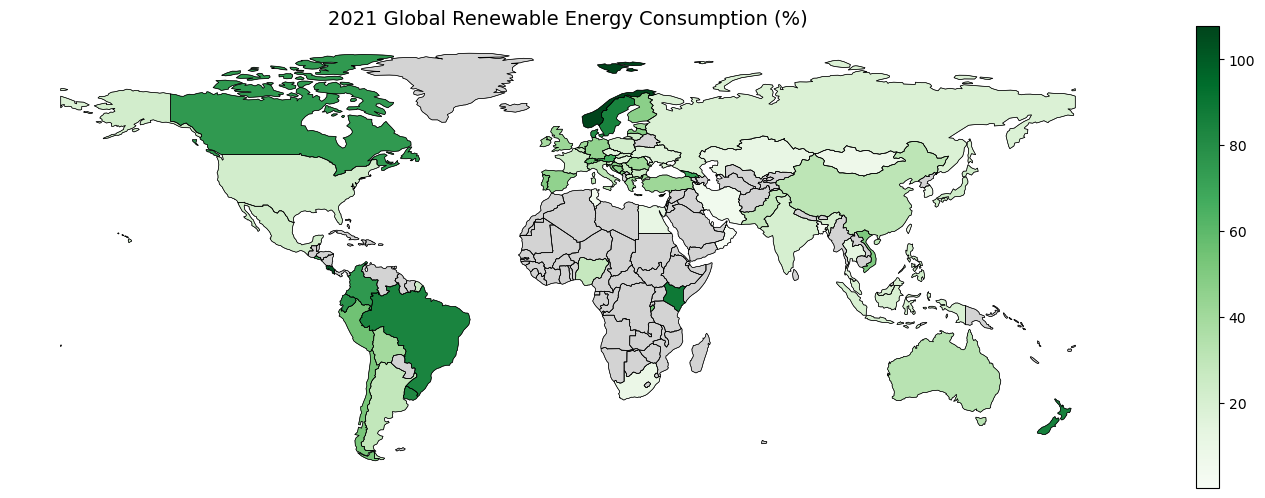

In [235]:
# Load a world map
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")
global_energy = pd.read_csv("data/World Energy Consumption.csv")
global_energy["renewable_energy_pct"] = global_energy["renewables_electricity"] / global_energy["electricity_demand"] * 100.0

a = world["ADM0_A3"]

# Current Global Renewable Energy usage
current_renewable_energy = global_energy[global_energy["year"] == 2022]
print(current_renewable_energy.info())
current_renewable_energy = current_renewable_energy[current_renewable_energy['iso_code'].isin(a)]
print(current_renewable_energy.info())

world = pd.merge(
    left=world,
    right=current_renewable_energy,
    left_on="ADM0_A3",
    right_on="iso_code",
    how='left'
)
a = ["Antarctica"]
world = world[~world['NAME'].isin(a)]

fig, ax = plt.subplots(figsize=(18, 6))
world.boundary.plot(ax=ax, linewidth=0.25, color="black")  # Country borders
world.plot(column="renewable_energy_pct", cmap="Greens", edgecolor="black",
           linewidth=0.5, legend=True, ax=ax, missing_kwds={"color": "lightgray"})

plt.title("2021 Global Renewable Energy Consumption (%)", fontsize=14)
plt.axis("off")
plt.show()

/var/folders/p5/yqc5y7b53_vb9k9dsvnpspnr0000gn/T/ipykernel_79824/2539694176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Entity", y="Renewables (% equivalent primary energy)", data=mean_energy, palette="viridis")


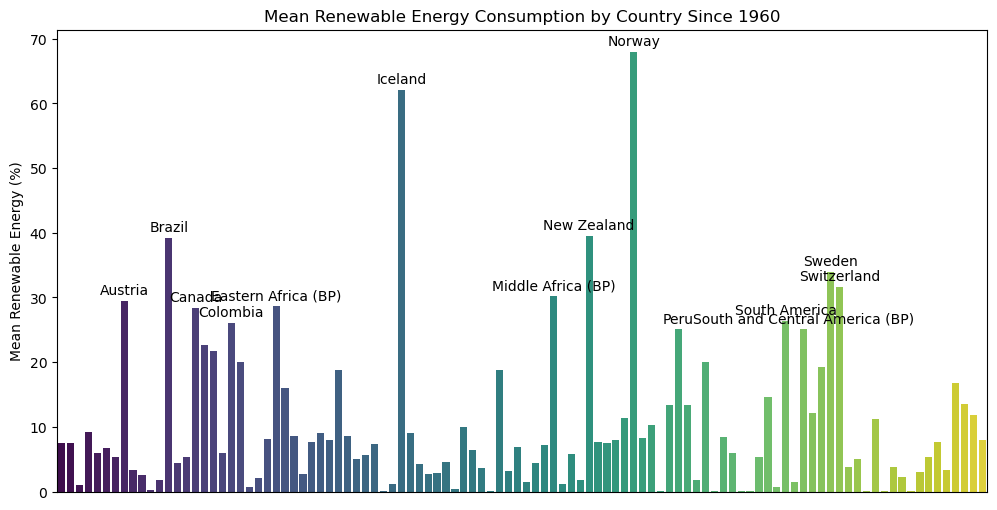

In [121]:
mean_energy = globalrenewable_energy.groupby("Entity")["Renewables (% equivalent primary energy)"].mean().reset_index()


# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot
ax = sns.barplot(x="Entity", y="Renewables (% equivalent primary energy)", data=mean_energy, palette="viridis")

threshold = 25  # Only show labels for values above 40%

for index, row in mean_energy.iterrows():
    if row["Renewables (% equivalent primary energy)"] > threshold:
        ax.text(row.name, row["Renewables (% equivalent primary energy)"] + 1, row["Entity"], ha="center", fontsize=10)


# Hide x-axis labels
plt.xticks([], [])

# Labels and title
plt.xlabel("")
plt.ylabel("Mean Renewable Energy (%)")
plt.title("Mean Renewable Energy Consumption by Country Since 1960")

plt.show()

/var/folders/p5/yqc5y7b53_vb9k9dsvnpspnr0000gn/T/ipykernel_79824/3359781192.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_df = renewable_prod_energy.groupby('Period')[energy_columns].sum()


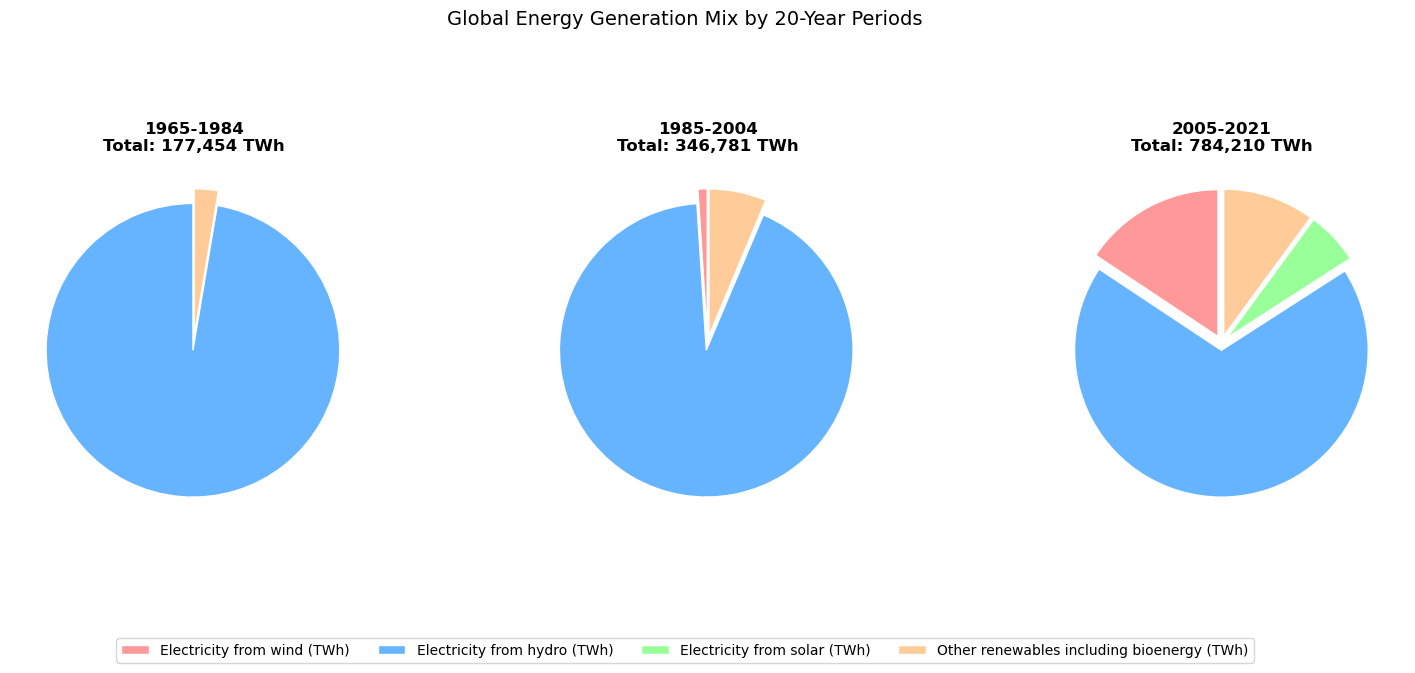

In [146]:
renewable_prod_energy = pd.read_csv("data/03 modern-renewable-prod.csv")

# Create 20-year time periods
bins = [1965, 1985, 2005, 2025]
labels = ['1965-1984', '1985-2004', '2005-2021']
renewable_prod_energy['Period'] = pd.cut(renewable_prod_energy['Year'], bins=bins, labels=labels, right=False)

# Aggregate data by period
energy_columns = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]

period_df = renewable_prod_energy.groupby('Period')[energy_columns].sum()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

# Custom colors and settings
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

# Plot pie charts for each period
for i, (period, row) in enumerate(period_df.iterrows()):
    ax = axes[i]
    values = row.values
    total = sum(values)
    
    # Format labels with percentages
    labels = [f'{energy}\n({val/total:.1%})' 
             for energy, val in zip(energy_columns, values)]
    
    ax.pie(values, 
          colors=colors, 
          explode=explode,
          startangle=90,
          wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    
    ax.set_title(f'{period}\nTotal: {total:,.0f} TWh', fontweight='bold')

# Create legend
fig.legend(labels=energy_columns,
          loc='lower center',
          ncol=4,
          bbox_to_anchor=(0.5, -0.05))

plt.suptitle('Global Energy Generation Mix by 20-Year Periods', y=1.05, fontsize=14)
plt.show()

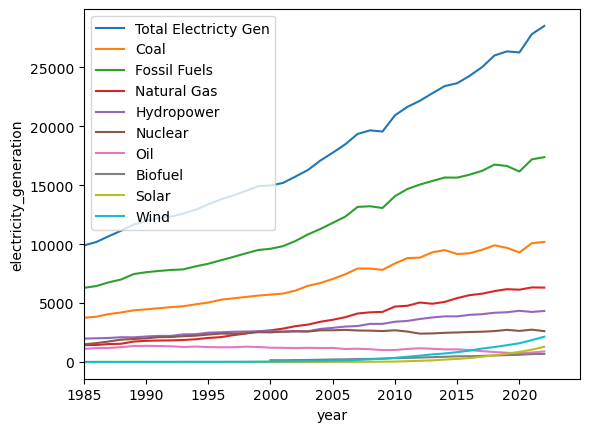

In [243]:
energy_by_time_type = global_energy[['coal_electricity', 'electricity_generation', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'biofuel_electricity', 'solar_electricity', 'wind_electricity', 'year', 'country']]
globe = ["World"]
energy_by_time_type = energy_by_time_type[energy_by_time_type['country'].isin(globe)]


sns.lineplot(data=energy_by_time_type, x='year', y='electricity_generation', label='Total Electricty Gen')
sns.lineplot(data=energy_by_time_type, x='year', y='coal_electricity', label='Coal')
sns.lineplot(data=energy_by_time_type, x='year', y='fossil_electricity', label='Fossil Fuels')
sns.lineplot(data=energy_by_time_type, x='year', y='gas_electricity', label='Natural Gas')
sns.lineplot(data=energy_by_time_type, x='year', y='hydro_electricity', label='Hydropower')
sns.lineplot(data=energy_by_time_type, x='year', y='nuclear_electricity', label='Nuclear')
sns.lineplot(data=energy_by_time_type, x='year', y='oil_electricity', label='Oil')
sns.lineplot(data=energy_by_time_type, x='year', y='biofuel_electricity', label='Biofuel')
sns.lineplot(data=energy_by_time_type, x='year', y='solar_electricity', label='Solar')
sns.lineplot(data=energy_by_time_type, x='year', y='wind_electricity', label='Wind').set_xlim(1985)
plt.legend()
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 18 to 22007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gdp                     167 non-null    float64
 1   renewables_electricity  251 non-null    float64
 2   year                    286 non-null    int64  
 3   iso_code                219 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 11.2+ KB
None


Text(0.1, 0.9, 'Pearson r = 0.87')

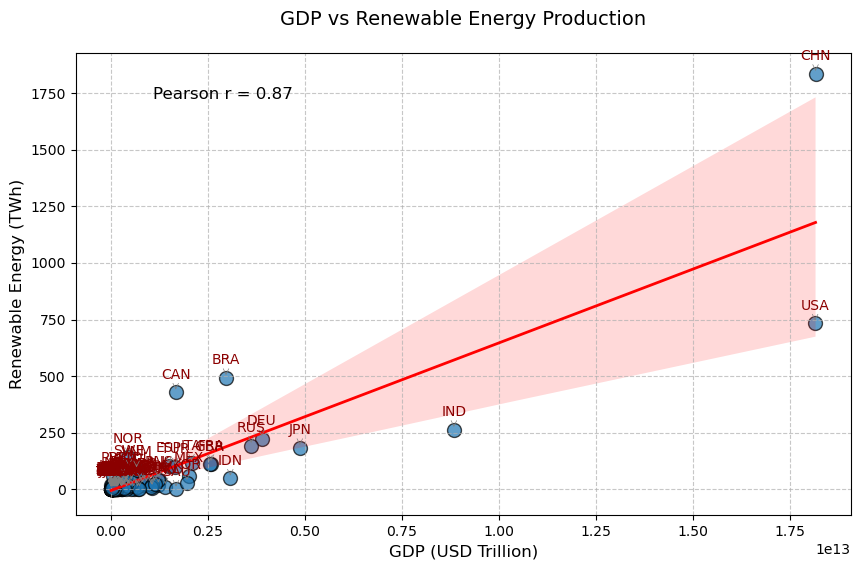

In [214]:
from scipy.stats import linregress
country_global_energy = global_energy[['gdp', 'renewables_electricity', 'year', 'iso_code']]

# Q1 = country_global_energy["renewables_electricity"].quantile(0.25)
# Q3 = country_global_energy["renewables_electricity"].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
# country_global_energy = country_global_energy[(country_global_energy["renewables_electricity"] >= lower_bound) & (country_global_energy["renewables_electricity"] <= upper_bound)]

a = [2018]
b = world["ADM0_A3"]

country_global_energy = country_global_energy[country_global_energy['year'].isin(a)]
print(country_global_energy.info())
country_global_energy = country_global_energy[country_global_energy['iso_code'].isin(b)]

# Fit regression model to calculate residuals
slope, intercept, r_value, p_value, std_err = linregress(
    country_global_energy['gdp'],
    country_global_energy['renewables_electricity']
)
country_global_energy['Predicted'] = slope * country_global_energy['gdp'] + intercept
country_global_energy['Residual'] = country_global_energy['renewables_electricity'] - country_global_energy['Predicted']

# Identify top N outliers (e.g., 3 largest residuals)
N = 3
outliers = country_global_energy.nlargest(N, 'Residual', keep='all')  # Use abs(df['Residual']) for absolute residuals


plt.figure(figsize=(10, 6))
sns.regplot(
    x="gdp",
    y="renewables_electricity",
    data=country_global_energy,
    scatter_kws={'s': 100, 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': 'red', 'lw': 2}
)


# Customize plot
plt.title('GDP vs Renewable Energy Production', fontsize=14, pad=20)
plt.xlabel('GDP (USD Trillion)', fontsize=12)
plt.ylabel('Renewable Energy (TWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


# Annotate outliers
for idx, row in outliers.iterrows():
    plt.annotate(
        row['iso_code'],
        (row['gdp'], row['renewables_electricity']),
        textcoords="offset points",
        xytext=(0, 10),  # Adjust text position
        ha='center',
        fontsize=10,
        color='darkred',
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5)
    )

corr = country_global_energy['gdp'].corr(country_global_energy['renewables_electricity'])
plt.text(0.1, 0.9, f'Pearson r = {corr:.2f}', 
         transform=plt.gca().transAxes, fontsize=12)


<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 141 to 22007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gdp                     157 non-null    float64
 1   renewables_electricity  216 non-null    float64
 2   year                    216 non-null    int64  
 3   iso_code                206 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 8.4+ KB
None


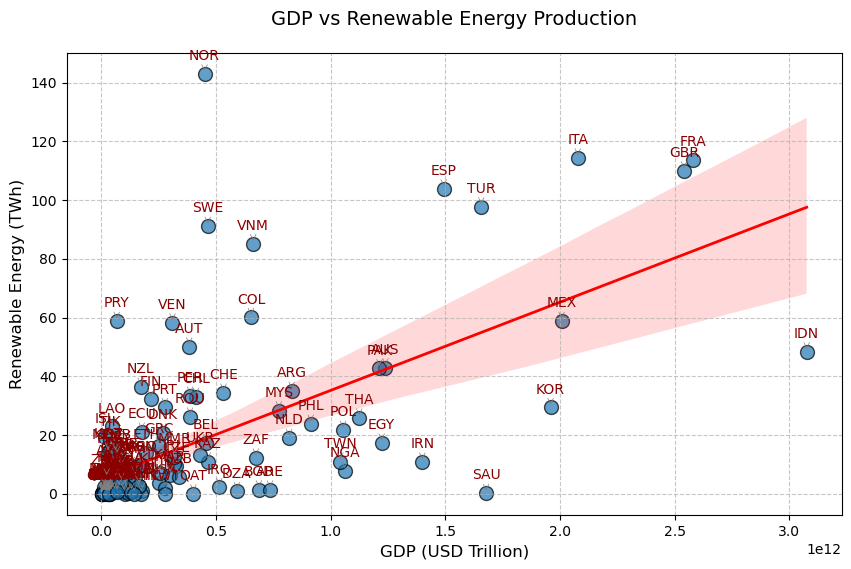

In [219]:
from scipy.stats import linregress
country_global_energy = global_energy[['gdp', 'renewables_electricity', 'year', 'iso_code']]

Q1 = country_global_energy["renewables_electricity"].quantile(0.25)
Q3 = country_global_energy["renewables_electricity"].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 3 * IQR, Q3 + 3 * IQR
country_global_energy = country_global_energy[(country_global_energy["renewables_electricity"] >= lower_bound) & (country_global_energy["renewables_electricity"] <= upper_bound)]

a = [2018]
b = world["ADM0_A3"]

country_global_energy = country_global_energy[country_global_energy['year'].isin(a)]
print(country_global_energy.info())
country_global_energy = country_global_energy[country_global_energy['iso_code'].isin(b)]

# Fit regression model to calculate residuals
slope, intercept, r_value, p_value, std_err = linregress(
    country_global_energy['gdp'],
    country_global_energy['renewables_electricity']
)
country_global_energy['Predicted'] = slope * country_global_energy['gdp'] + intercept
country_global_energy['Residual'] = country_global_energy['renewables_electricity'] - country_global_energy['Predicted']

# Identify top N outliers (e.g., 3 largest residuals)
N = 3
outliers = country_global_energy.nlargest(N, 'Residual', keep='all')  # Use abs(df['Residual']) for absolute residuals


plt.figure(figsize=(10, 6))
sns.regplot(
    x="gdp",
    y="renewables_electricity",
    data=country_global_energy,
    scatter_kws={'s': 100, 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': 'red', 'lw': 2}
)


# Customize plot
plt.title('GDP vs Renewable Energy Production', fontsize=14, pad=20)
plt.xlabel('GDP (USD Trillion)', fontsize=12)
plt.ylabel('Renewable Energy (TWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


# Annotate outliers
for idx, row in outliers.iterrows():
    plt.annotate(
        row['iso_code'],
        (row['gdp'], row['renewables_electricity']),
        textcoords="offset points",
        xytext=(0, 10),  # Adjust text position
        ha='center',
        fontsize=10,
        color='darkred',
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5)
    )
